In [1]:
import numpy

from nilmtk.api import API
import warnings

warnings.filterwarnings("ignore")
from nilmtk.disaggregate import DM_SDA, GaterSGN, SGN, DM_GATE2
import nilmtk.utils as utils

In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
# import pytorch_lightning as pl

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# from src import *

USE_GPU = True
device = torch.device("cuda:0" if USE_GPU and torch.cuda.is_available() else "cpu")
print(torch.__version__, device)

2.0.1 cuda:0


DM_GATE2
Started training for  DM_GATE2
Joint training for  DM_GATE2
............... Loading Data for training ...................
Loading data for  ukdale  dataset
Loading building ...  1
{'fill_method': None, 'how': 'mean'}
{'fill_method': None, 'how': 'mean'}
Dropping missing values
Train Jointly
Loading building ...  5
{'fill_method': None, 'how': 'mean'}
{'fill_method': None, 'how': 'mean'}
Dropping missing values
Train Jointly
Doing Preprocessing
Train df <class 'list'>
Train main (1828800, 1)


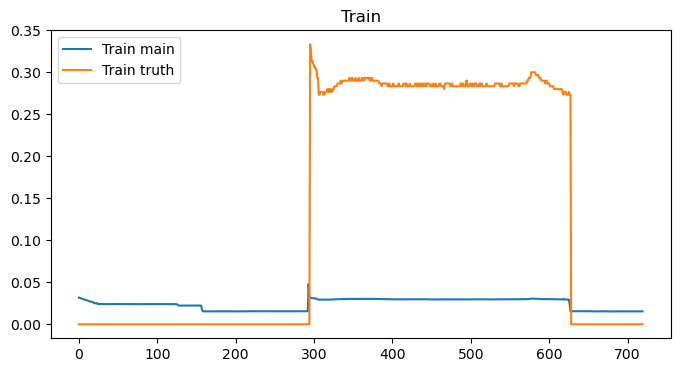

First model training for fridge
Is Time embed used ?  True
Unet dims: [2, 64, 128, 256, 512] [(2, 64), (64, 128), (128, 256), (256, 512)]
Loaded from ./fridge_ukdale_dm_best_state_dict.pt
Finished training for  DM_GATE2
Joint Testing for all algorithms
Loading data for  ukdale  dataset
{'fill_method': None, 'how': 'mean'}
{'fill_method': None, 'how': 'mean'}
Dropping missing values
Generating predictions for : DM_GATE2
Start dm disaggregating
Disaggregating fridge
test main (15120, 1)
torch.Size([1, 15120])
torch.Size([20, 1, 720]) torch.Size([20, 1, 720])
torch.Size([20, 64, 720])
torch.Size([20, 128, 360])
torch.Size([20, 256, 180])
torch.Size([20, 512, 90])
torch.Size([20, 512, 90])
torch.Size([20, 256, 90])
torch.Size([20, 128, 180])
torch.Size([20, 64, 360])


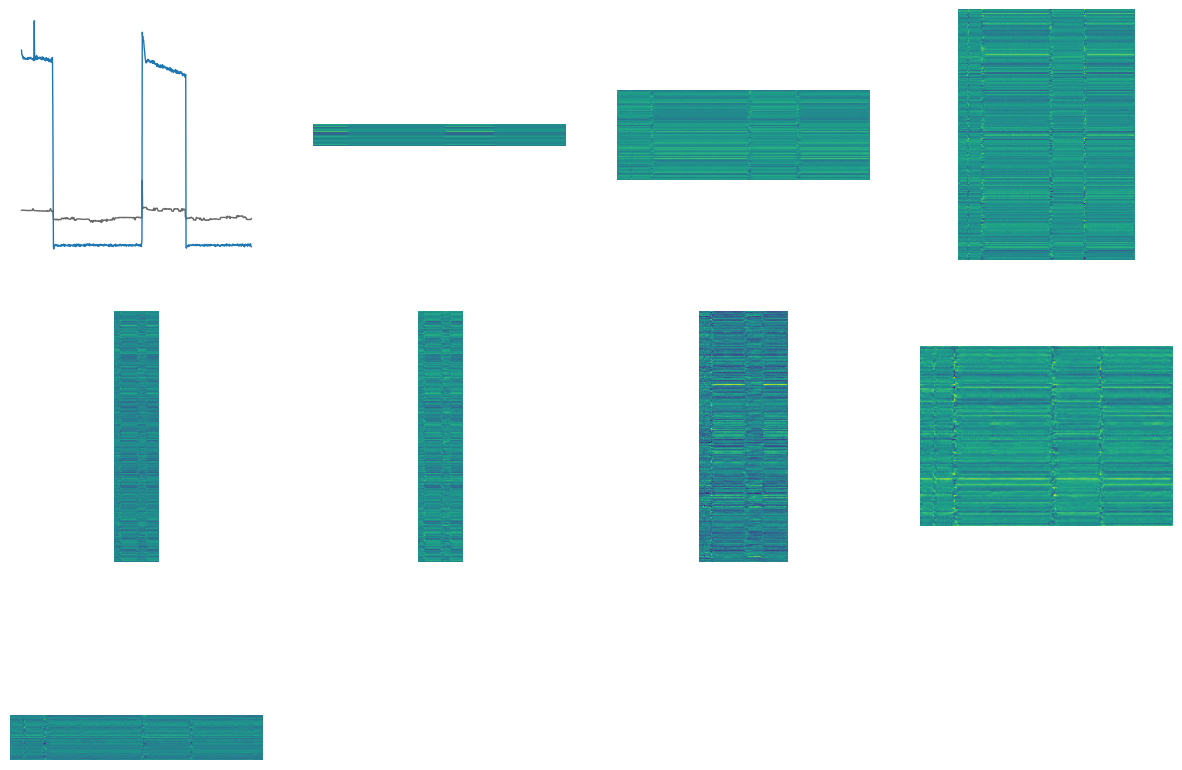

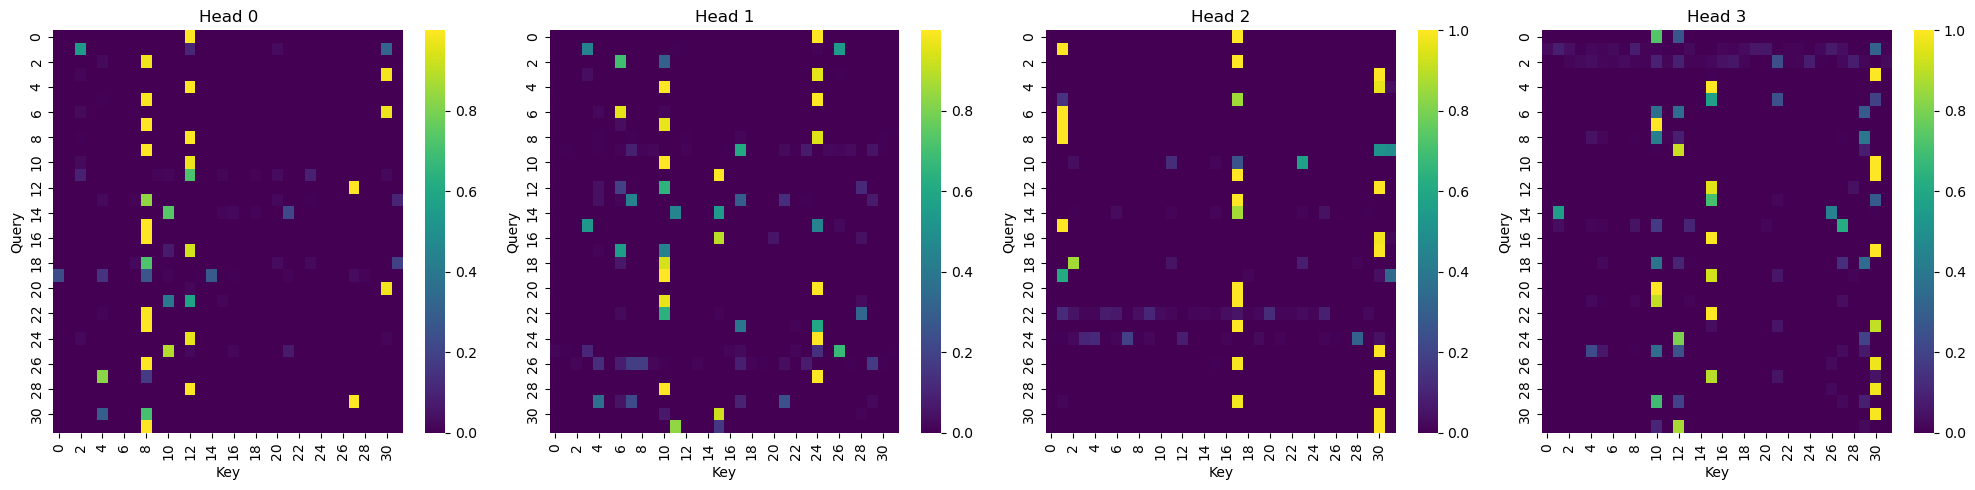

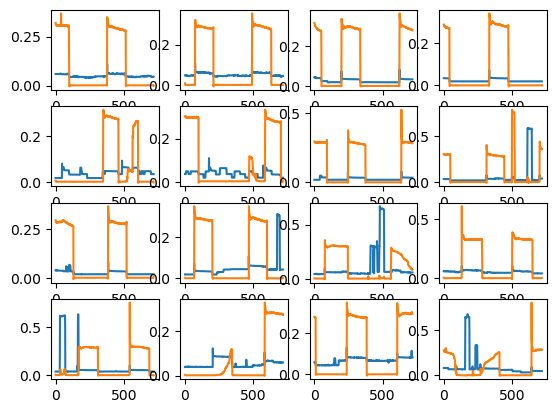

Inference Time consumption: 7.298406600952148s.
fridge prediction done, computing results
length 14400 14400 14400


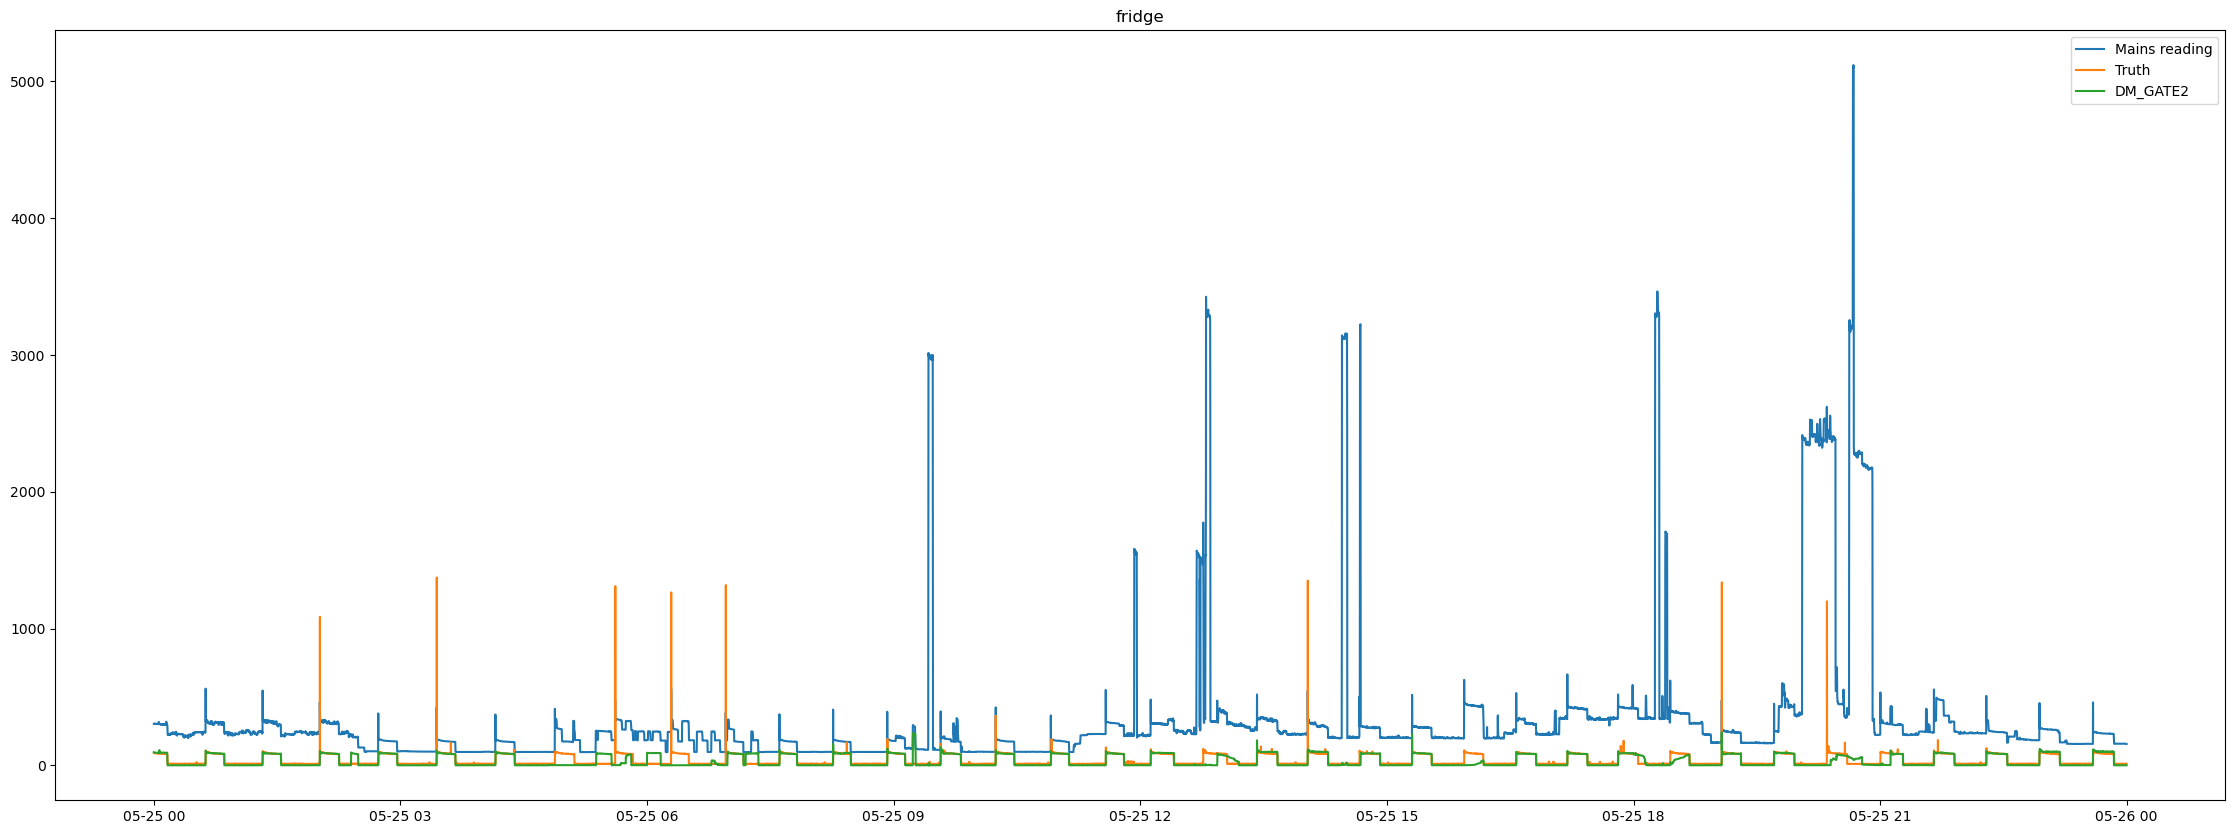

............  accuracy  ..............
        DM_GATE2
fridge  0.903264
............  f1score  ..............
        DM_GATE2
fridge   0.86323
............  mae  ..............
         DM_GATE2
fridge  16.103157
............  sae  ..............
        DM_GATE2
fridge   8.36242
............  precision  ..............
        DM_GATE2
fridge  0.888081
............  recall  ..............
        DM_GATE2
fridge  0.839733
............  nep  ..............
        DM_GATE2
fridge  0.411002
............  MCC  ..............
        DM_GATE2
fridge  0.789228


In [3]:
DATASET_NAME = "ukdale"

e = {
    # Specify power type, sample rate and disaggregated appliance
    'power': {
        'mains_train': ['active'],
        'mains_transfer': ['active'],
        'mains_test': ['active'],
                
        # 'appliance': ['active']
        # 'mains': ['apparent'],  # problem: ukdale active, redd apparent
        'appliance': ['active'],
    },
    'sample_rate': 6,
    'appliances': ['fridge'],
    # 'appliances': ['dish washer'],
    # Universally no pre-training
    'pre_trained': False,
    "app_meta": utils.APP_META[DATASET_NAME],
    # Specify algorithm hyper-parameters
    # 'gater': 
    #     # "GaterSGN": GaterSGN(
    #     # {'n_epochs': 10, 'batch_size': 256, 'test_only': False}),
    #     SGN({'n_epochs': 5, 'batch_size': 256, 'test_only': True, 'gate_only': True, 'note': 'ukdale'})
    #     ,
    'save': False,
    'methods': {
        "DM_GATE2": DM_GATE2(
            {'n_epochs': 5, 'batch_size': 64, 'sequence_length': 720, 'overlapping_step': 10,
            'test_only': True, 'fine_tune': False, 'src_rate': 0.0, 'lr': 5e-6, "sampler": "ddim", "patience": 3,
            'plot': True,
            "app_meta": utils.APP_META[DATASET_NAME], 'filter_train': False, 'note': DATASET_NAME, 'load_from': 'ukdale'})
         },
    # Specify train and test data
    'train': {
        'datasets': {
            'ukdale': {
                'path': 'mnt/ukdale.h5',
                'buildings': {
                    1: {
                        'start_time': '2013-05-31',
                        'end_time': '2013-07-31'
                    },
                    5: {
                        'start_time': '2014-07-01',
                        'end_time': '2014-09-05'
                    },
                }
            },
        }
    },
    # 'transfer': {
    #     'datasets': {
    #         'redd': {
    #             'path': 'mnt/redd.h5',
    #             'buildings': TRAIN
    #         },
    #     },
    # },
    'test': {
        'datasets': {
            'ukdale': {
                'path': 'mnt/ukdale.h5',
                'buildings': {
                    2: {
                        'start_time': '2013-05-25',
                        'end_time': '2013-05-26'
                    },
                }
            },
        },
        # Specify evaluation metrics
        'metrics': ['accuracy', 'f1score', 'mae', 'sae', 'precision', 'recall', 'nep', 'MCC']
    }
}

API(e)